In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('celeb_embeddings.csv')

In [3]:
# Utilisation des embeddings du DataFrame
features_extracted = df.drop('target', axis=1).values

In [4]:
# K-means pour créer des clusters
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(features_extracted)

c:\Users\jneed\Documents\projets\z_now\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
# Évaluation du modèle à l'aide de l'indice de silhouette
silhouette_avg = silhouette_score(features_extracted, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0955922511725935


In [7]:
# Le graphique de silhouette est un outil qui aide à évaluer la qualité d'un regroupement de données par k-means.
# Il fonctionne en calculant un score pour chaque point de données, 
# qui mesure la proximité du point à son cluster assigné par rapport aux autres clusters.

# Un score élevé signifie que le point est bien placé dans son cluster, 
# tandis qu'un score faible signifie que le point est plus proche d'autres clusters que de son cluster assigné.

# Le graphique de silhouette indique que les 2 clusters sont bien séparés. 
# Les scores de silhouette sont généralement élevés, ce qui signifie que la plupart 
# des points de données sont bien placés dans leur cluster respectif.

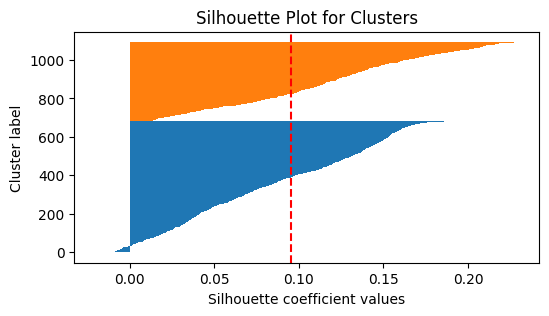

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calcul du Silhouette Score pour chaque point
silhouette_vals = silhouette_samples(features_extracted, clusters)

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(6, 3))

# graphique de silhouette
y_lower, y_upper = 0, 0
for i in range(len(np.unique(clusters))):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_lower += len(cluster_silhouette_vals)

#la ligne moyenne
silhouette_avg = silhouette_score(features_extracted, clusters)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

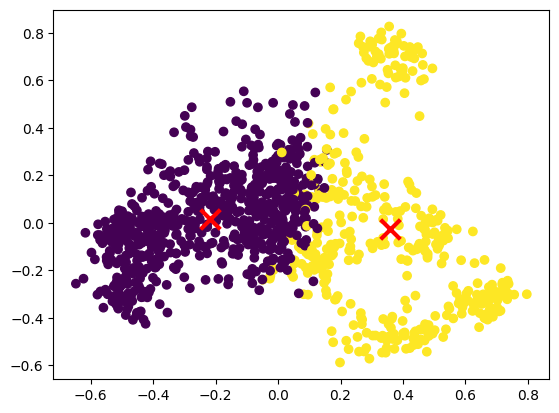

In [9]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of your data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_extracted)

# Scatter plot of the reduced data
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)

# Mark cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=200, linewidths=3, color='r')

plt.show()

In [ ]:
# Remarque : 
# l'utilisation de `cluster=2` trouve des clusters sans signification pratique. 
# Pour une meilleure précision, il est préférable de calculer les clusters à partir des embeddings des personnes autorisées, 
# sachant que le nombre de clusters est connu.

In [10]:
### Axe X - Coefficient de Silhouette :
# L'axe x mesure le coefficient de silhouette pour chaque point de données.

### Axe Y - Cluster Label :
# L'axe y représente les clusters

### Ligne moyenne (en rouge) : 
# La ligne rouge représente la moyenne des coefficients de silhouette pour l'ensemble du cluster. 
# + cette ligne est élevée, + la séparation entre les clusters est bonne.

In [11]:
df = pd.read_csv(r"C:\Users\jneed\Documents\projets\z_now\classifier\authorized_embeddings.csv")
# Utilisation des embeddings du DataFrame
features_extracted = df.drop('target', axis=1).values

In [12]:
# Cette fois çi, on utilise que les embeddings des personnes autorisées pour créer les clusters.
# Et on précise le nombre de clusters à 8.

# K-means pour créer des clusters
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(features_extracted)

c:\Users\jneed\Documents\projets\z_now\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Évaluation du modèle à l'aide de l'indice de silhouette
silhouette_avg = silhouette_score(features_extracted, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.35192121804364923


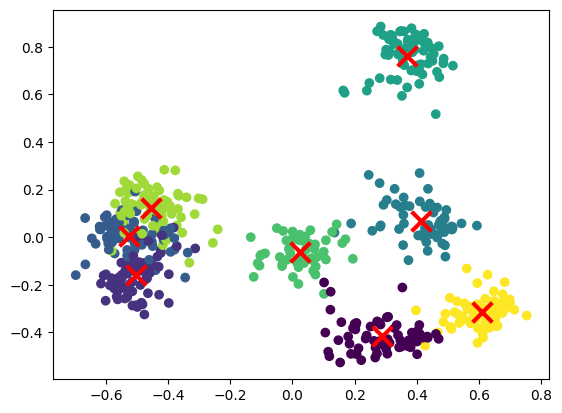

In [14]:
# from sklearn.decomposition import PCA

# Reduce the dimensionality of your data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_extracted)

# Scatter plot of the reduced data
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)

# Mark cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=200, linewidths=3, color='r')

plt.show()

In [15]:
# On voit que les 8 clusters sont bien séparés. 
# On peut donc probablement utiliser ce modèle pour prédire reconnaître les personnes autorisées.
# par contre, ce modèle ne permet pas de reconnaître les personnes non autorisées. 
# Ce qui et notre objectif.